## **Lead Scoring Case Study**

### **Summary of Problem Statement**

X Education sells online courses to professionals through their website and marketing efforts. However, they struggle with low lead conversion rates, with only around 30% of acquired leads becoming paying customers. 

To address this issue, X Education wants to identify "Hot Leads" with a higher likelihood of conversion. They need a lead scoring model to assign scores based on conversion potential. The CEO's target is to increase the conversion rate to around 80%. By focusing their sales efforts on the most promising leads, X Education aims to improve efficiency and boost overall conversion rates. The model should help prioritize communication and engagement with potential customers who are more likely to convert.

### **Objectives of this case study**

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target  potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

* There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. These problems are provided in a separate doc file. It will be filled based on the logistic regression model we get. Also, will make sure to include this in the final PPT where we will make recommendations.

### **Data** 

* We have been provided with a leads dataset from the past with around 9000 data points. 
* This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.
* The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.
* We have also been provided with a  data dictionary 

### **Approach**

* Importing Libraries

* Loading the dataset

* Inspecting and understanding the data

* Data Cleaning and some EDA, some steps taken include:
    * Handling the 'Select' level that is present in some categorical variables
    * Dropping columns with high percentage of missing values and/or redundant columns
    * Checking the number of unique categories in categorical columns
    * Imputation of missing values in cloumns with less percentage of missing values
    * Some feature manupulation
    * Dropping extremely skewed features
    * Handling of outliers

* Exploratory Data Analysis
    * Categorical variable analysis
    * Numerical variable analysis

* Data Preparation
    * Converting some binary variables (Yes/No) to 0/1
    * Creating dummies for other categorical variables
    * Performing train - test split (I used train - 70%, test - 30%)
    * Feature Scaling

* Model Building
    * Built multiple models iteratively
    * Using Recursive Feature Elimination (RFE) to eliminate some less signicant features
    * Using p - value to retain only significant features
    * Using Variance Inflation Factor (VIF), to limit multicollinearity 

* Model Evaluation, this included: 
    * Using accuracy
    * Using Receiver Operating Charateristic (ROC) Curve
    * Using Sensitivity and Specificity
    * Using Precision and Recall

* Making predictions on the test set
    * Comparing model performance versus the train data to ensure the model generalized well on test data

* Calculating Lead Score

* Determining Feature Importance

* Conclusion




### **1. Importing Libraries**

In [430]:
# Libraries for numeric and dataframe computation
import numpy as np 
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


### **2. Loading the dataset**

In [431]:
# Importing the dataset
leads_df = pd.read_csv('Leads.csv')

### **3. Inspecting and Understanding the data**

In [432]:
# Seeing the first 5 rows of the dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [433]:
# Checking the shape of the dataset
leads_df.shape

(9240, 37)

In [434]:
# Checking the data types of the columns and missing values
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [435]:
# Checking for duplicate values
leads_df.duplicated().sum()

0

In [436]:
# Checking the percentage of missing values in each column
round(100*(leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)), 2)

Lead Quality                                    51.59
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Tags                                            36.29
Lead Profile                                    29.32
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [437]:
# Checking summary statistics of numeric columns to understand the spread of the dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


#### Observations and Insights:

* The dataset has 9240 enteries and 37 columns
* There are no duplicate values in the dataset
* The dataset has missing values, we will need to deal with these when cleaning the data
* The dataset has some redundant columns e.g Lead columns - a number assigned to each lead, we will likely drop these
* From observing the data, we will need to do some of the following:
    * Convert the level 'Select' to NaN as Select means the customer did not select an option
    * Handle missing values by either removing or imputing these values
    * Encode categorical variables for easier understanding by the model
    * Remove redundant coulumns


### **4. Data Cleaning and some EDA**

### 4.1 Handling of "Select" values 

Certain categorical variables contain a category labeled 'Select' that requires special handling, as it can be considered equivalent to a null value. One possible reason for this is that the customer did not make a selection from the available options, resulting in the default 'Select' value being recorded in those columns.

In [438]:
# Finding all columns with 'select' as value
leads_df[leads_df=='Select'].count()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

### Notes

* The following columns contain 'Select' : ['Specialization',  'How did you hear about X Education',  'Lead Profile',  'City']

In [439]:
# Converting 'select' values to NaN
leads_df = leads_df.replace('Select', np.nan)

In [440]:
# Confirming if all 'select' values are converted to NaN
leads_df[leads_df=='Select'].count()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [441]:
# Checking the percentage of missing values in each column
round(100*(leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)), 2)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Index                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [442]:
# Checking the number of unique values in each column
leads_df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
What is your current occupation                     6
City                                                6
Lead Origin                                         5
Lead Profile                                        5
Lead Quality                

In [443]:
# Generating columns list
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [444]:
# We will drop coulmns that are redundant or have high percentage of missing values
cols_to_drop = ['How did you hear about X Education','Lead Profile','Asymmetrique Profile Index','Asymmetrique Activity Index',
                'Asymmetrique Activity Score','Asymmetrique Profile Score','Prospect ID','Lead Number']

In [445]:
# Dropping the columns
leads_df = leads_df.drop(cols_to_drop, axis=1)

In [446]:
#Checking if columns are dropped
leads_df.shape

(9240, 29)

### Thoughts:
We will conduct a thorough examination of columns containing missing values and subsequently determine the appropriate approach for addressing the missing values in each column

In [447]:
# Creating list of columns to investigate
col_list = ['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation',
            'Country','Last Activity','Lead Source']

### 4.2 Checking the value counts of each column

In [448]:
# Checking the value counts of each column
for col in col_list:
    percentage =(leads_df[col].value_counts(normalize=True)*100).round(2)
    print('Value_count percentage of:',col,'\n')
    print(percentage,'\n')
    print('_'*50,'\n')

Value_count percentage of: City 

Mumbai                        57.84
Thane & Outskirts             13.50
Other Cities                  12.31
Other Cities of Maharashtra    8.20
Other Metro Cities             6.82
Tier II Cities                 1.33
Name: City, dtype: float64 

__________________________________________________ 

Value_count percentage of: Specialization 

Finance Management                  16.66
Human Resource Management           14.47
Marketing Management                14.30
Operations Management                8.58
Business Administration              6.88
IT Projects Management               6.25
Supply Chain Management              5.96
Banking, Investment And Insurance    5.77
Travel and Tourism                   3.46
Media and Advertising                3.46
International Business               3.04
Healthcare Management                2.71
Hospitality Management               1.95
E-COMMERCE                           1.91
Retail Management                   

#### Observations and Insights:
* **City:** The City column has 39.71% missing values. If we impute these missing values with 'Mumbai', it may introduce further skewness to the data. Such skewness can potentially lead to bias in the model. Therefore, we can drop the City column.
* **Specialization:** The Specialization column has 36.58% missing values. However, the selected specializations are evenly distributed among the available options. Therefore, neither imputation nor dropping the column would be a suitable choice. Instead, we will create an additional category called 'Others' to encompass the missing values and consolidate less frequently occurring specializations.
* **Tags:** The Tags column contains 36.29% missing values. These tags are assigned to customers indicating the current status of the lead. However, since this column represents the current status, it may not provide significant utility for modeling purposes. Therefore, it is reasonable to drop the Tags column.
* **What matters most to you in choosing a course:** This variable exhibits 29.32% missing values. Furthermore, 99.95% of customers have selected the option "better career prospects". This is extremely skewed and will not provide meaningful insights for analysis as it may create bias.
* **What is your current occupation** We can impute the missing values with 'Unemployed' since it has the highest frequency among the available values. This variable seems to hold importance from a business context, as X Education offers online courses and individuals who are unemployed may be inclined to enroll in these courses to enhance their employability prospects.
* **Country:** Since X Education primarily sells online courses and approximately 96% of its customers are from India, it is not currently reasonable to impute missing values with 'India'. Consequently, it is recommended to drop the 'Country' column.
* **Last Activity:** "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.
* **Lead Source:** 'Google' has the highest number of occurences and this column is just 0.39% missing values, hence we will impute the missing values with label 'Google'. Also we can group low frequency values together.

In [449]:
# Dropping columns
leads_df = leads_df.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1)


In [450]:
# Cofiroming if columns are dropped
leads_df.shape

(9240, 25)

### 4.3 Imputing the following columns
* 'Specialization'
* 'What is your current occupation'
* 'Last Activity'
* 'Lead Source'

In [451]:
# Imputing missing values
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leads_df = leads_df.fillna(value=missing_values)

In [452]:
# Checking the percentage of missing values in remaining columns
round(100*(leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)), 2)

Lead Quality                               51.59
TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Source                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on 

### Let us further investigate 'Specialization column'

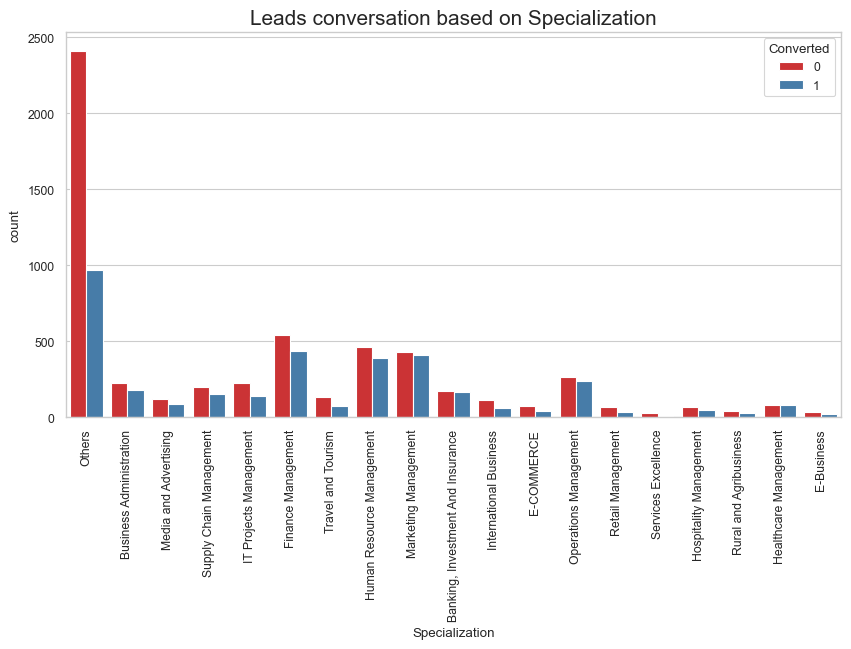

In [453]:
# Plotting the distribution of Specialization

# Creating a figure
plt.figure(figsize=(10,5))

# Plotting a countplot
count_plot = sns.countplot(leads_df['Specialization'], hue=leads_df['Converted'], palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

plt.title('Leads conversation based on Specialization', fontsize=15)
plt.show()


#### Observations and Insights:
* Management seems to be an important Specialization, we can combine the entire Management into one segment 'Management Specializations' for easier analysis

In [454]:
leads_df['Specialization'] = leads_df['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management','Marketing Management',
                                                                 'Operations Management','Retail Management','Hospitality Management','Healthcare Management'],'Management Specializations')

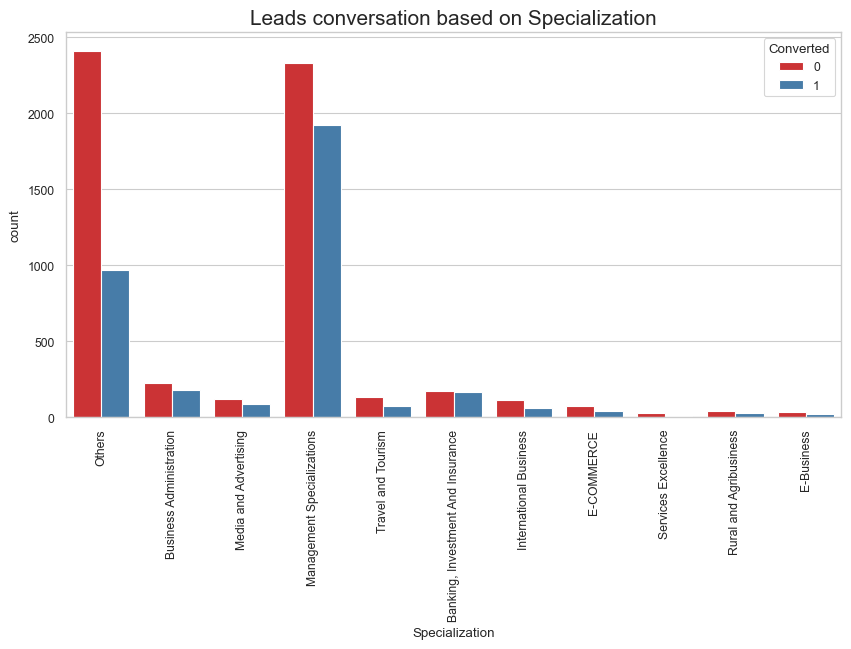

In [455]:
# Plotting the distribution of Specialization after grouping Management Specializations

# Creating a figure
plt.figure(figsize=(10,5))

# Plotting a countplot
count_plot = sns.countplot(leads_df['Specialization'], hue=leads_df['Converted'], palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

plt.title('Leads conversation based on Specialization', fontsize=15)
plt.show()

### Let us further investigate the employment variable: 'What is your current occupation'

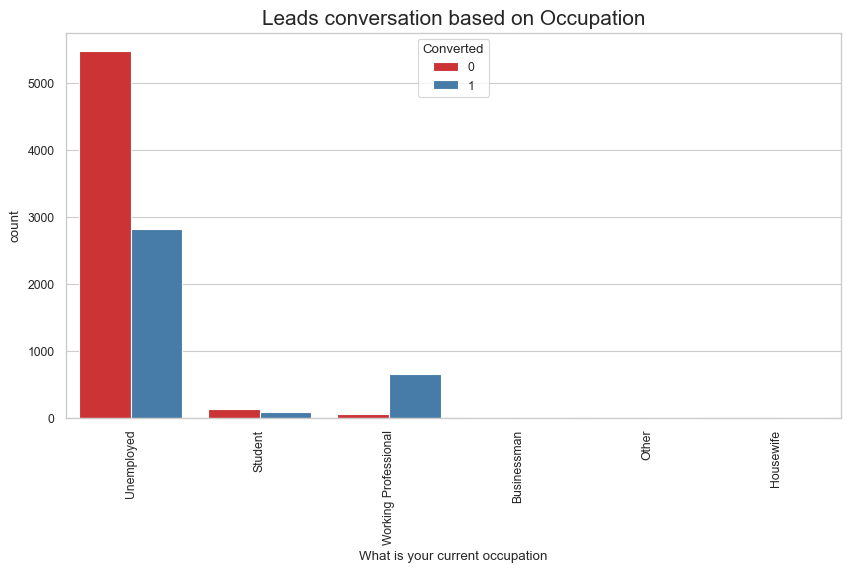

In [456]:
# Plotting the distribution of the employment variable

# Creating a figure
plt.figure(figsize=(10,5))

# Plotting a countplot
count_plot = sns.countplot(leads_df['What is your current occupation'], hue=leads_df['Converted'], palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

plt.title('Leads conversation based on Occupation', fontsize=15)
plt.show()

#### Observations and Insights:

* Most of the successfully converted leads come from the Unemployed
* The are good chances of a working professional to sign up for a course
* It appears that the categories of "Housewives," "Businessman," "Student," and "Other" are not easily converted to enroll in the course

### Imputing 'Last Activity' column

In [457]:
# Replacing missing values with 'Email Opened'
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [458]:
# Grouping low frequency values into 'Others'
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
                                                               'Approached upfront','Unreachable','Unsubscribed','Email Received','Email Marked Spam',
                                                               'Email Received','Resubscribed to emails','Form Submitted on Website'],'Others')


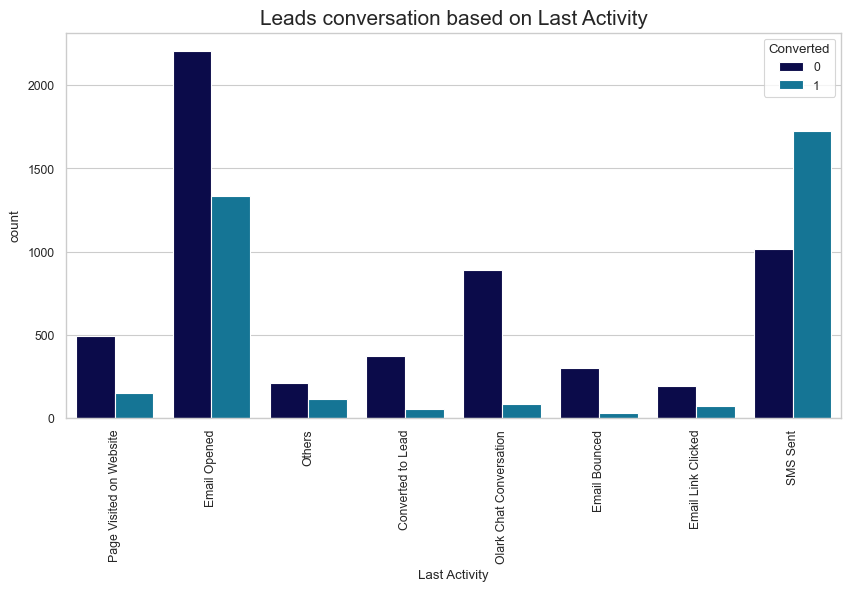

In [459]:
# Visualizing the distribution of the 'Last Activity' column

# Creating a figure
plt.figure(figsize=(10,5))

# Plotting a countplot
count_plot = sns.countplot(leads_df['Last Activity'], hue=leads_df['Converted'], palette='ocean')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

plt.title('Leads conversation based on Last Activity', fontsize=15)
plt.show()

#### Observations and Insights:

* SMS Sent has the highest success conversion rate followed by Email Opened

### Imputing 'Lead Source' column

In [460]:
# Replacing missing values with 'Google'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

In [461]:
# Grouping low frequency values together
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'] ,'Others')

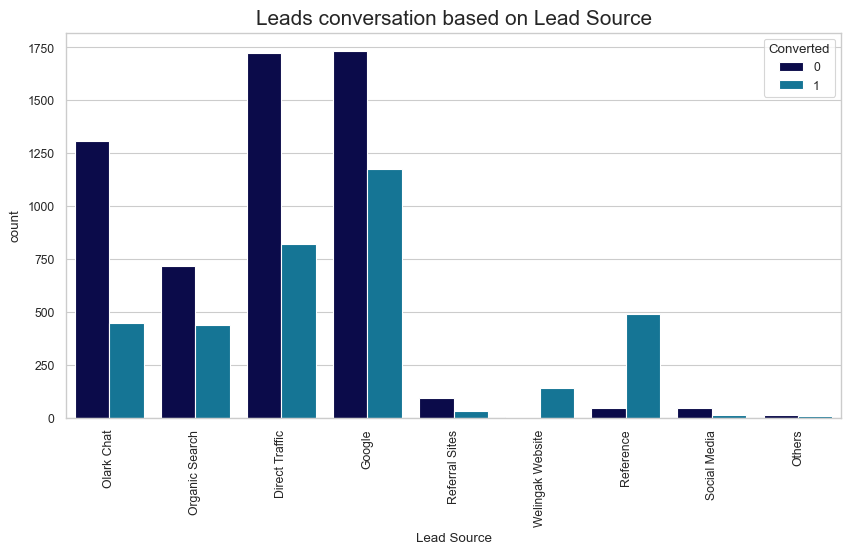

In [462]:
# Visualizing the distribution of the 'Lead Source' column

# Creating a figure
plt.figure(figsize=(10,5))

# Plotting a countplot
count_plot = sns.countplot(leads_df['Lead Source'], hue=leads_df['Converted'], palette='ocean')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

plt.title('Leads conversation based on Lead Source', fontsize=15)
plt.show()

#### Observations and Insights:

* The majority of generated leads come from Google and Direct traffic, while the least number of leads originate from Others.
* The Welingak website exhibits a very high conversion rate, hence, it  is advisable to maximize leads from this website.
* Prioritizing Olark chat, Organic search, Direct traffic, and Google leads may result in increased lead conversion.

### Imputing 'Lead Quality' column

### Thoughts:
 **Lead Quality** seems to be important from a business perspective but has 51.59% missing values. We will classify these as 'Not Sure' since these values are important for our analysis

In [463]:
# Converting missing values to 'not_sure'
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan,'Not Sure')
print(leads_df['Lead Quality'].value_counts())

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


In [464]:
# Checking the percentage of missing values in remaining columns
round(100*(leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)), 2)

TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Origin                                0.00
X Education Forums                         0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Lead Quality                               0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
Magazine                                   0.00
Newspaper Article                          0.00
Lead Source                                0.00
Search                                     0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Total Time Spent on Website             

### Thoughts:
* The remaining missing values are too few to affect our analysis, less than 2 %. We will just drop these

In [465]:
# Dropping the remaining missing values
leads_df = leads_df.dropna()

In [466]:
# Checking the percentage of missing values in remaining columns
round(100*(leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)), 2)

Lead Origin                                0.00
Newspaper Article                          0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Lead Quality                               0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Magazine                                   0.00
Lead Source                                0.00
Search                                     0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Page Views Per Visit                       0.00
Total Time Spent on Website                0.00
TotalVisits                             

In [467]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,Low in Relevance,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Not Sure,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Might be,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Not Sure,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,No,Might be,No,No,No,No,Modified


### **5. Exploratory Data Analysis**

### 5.1 Analyzing categorical variables

In [468]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation     

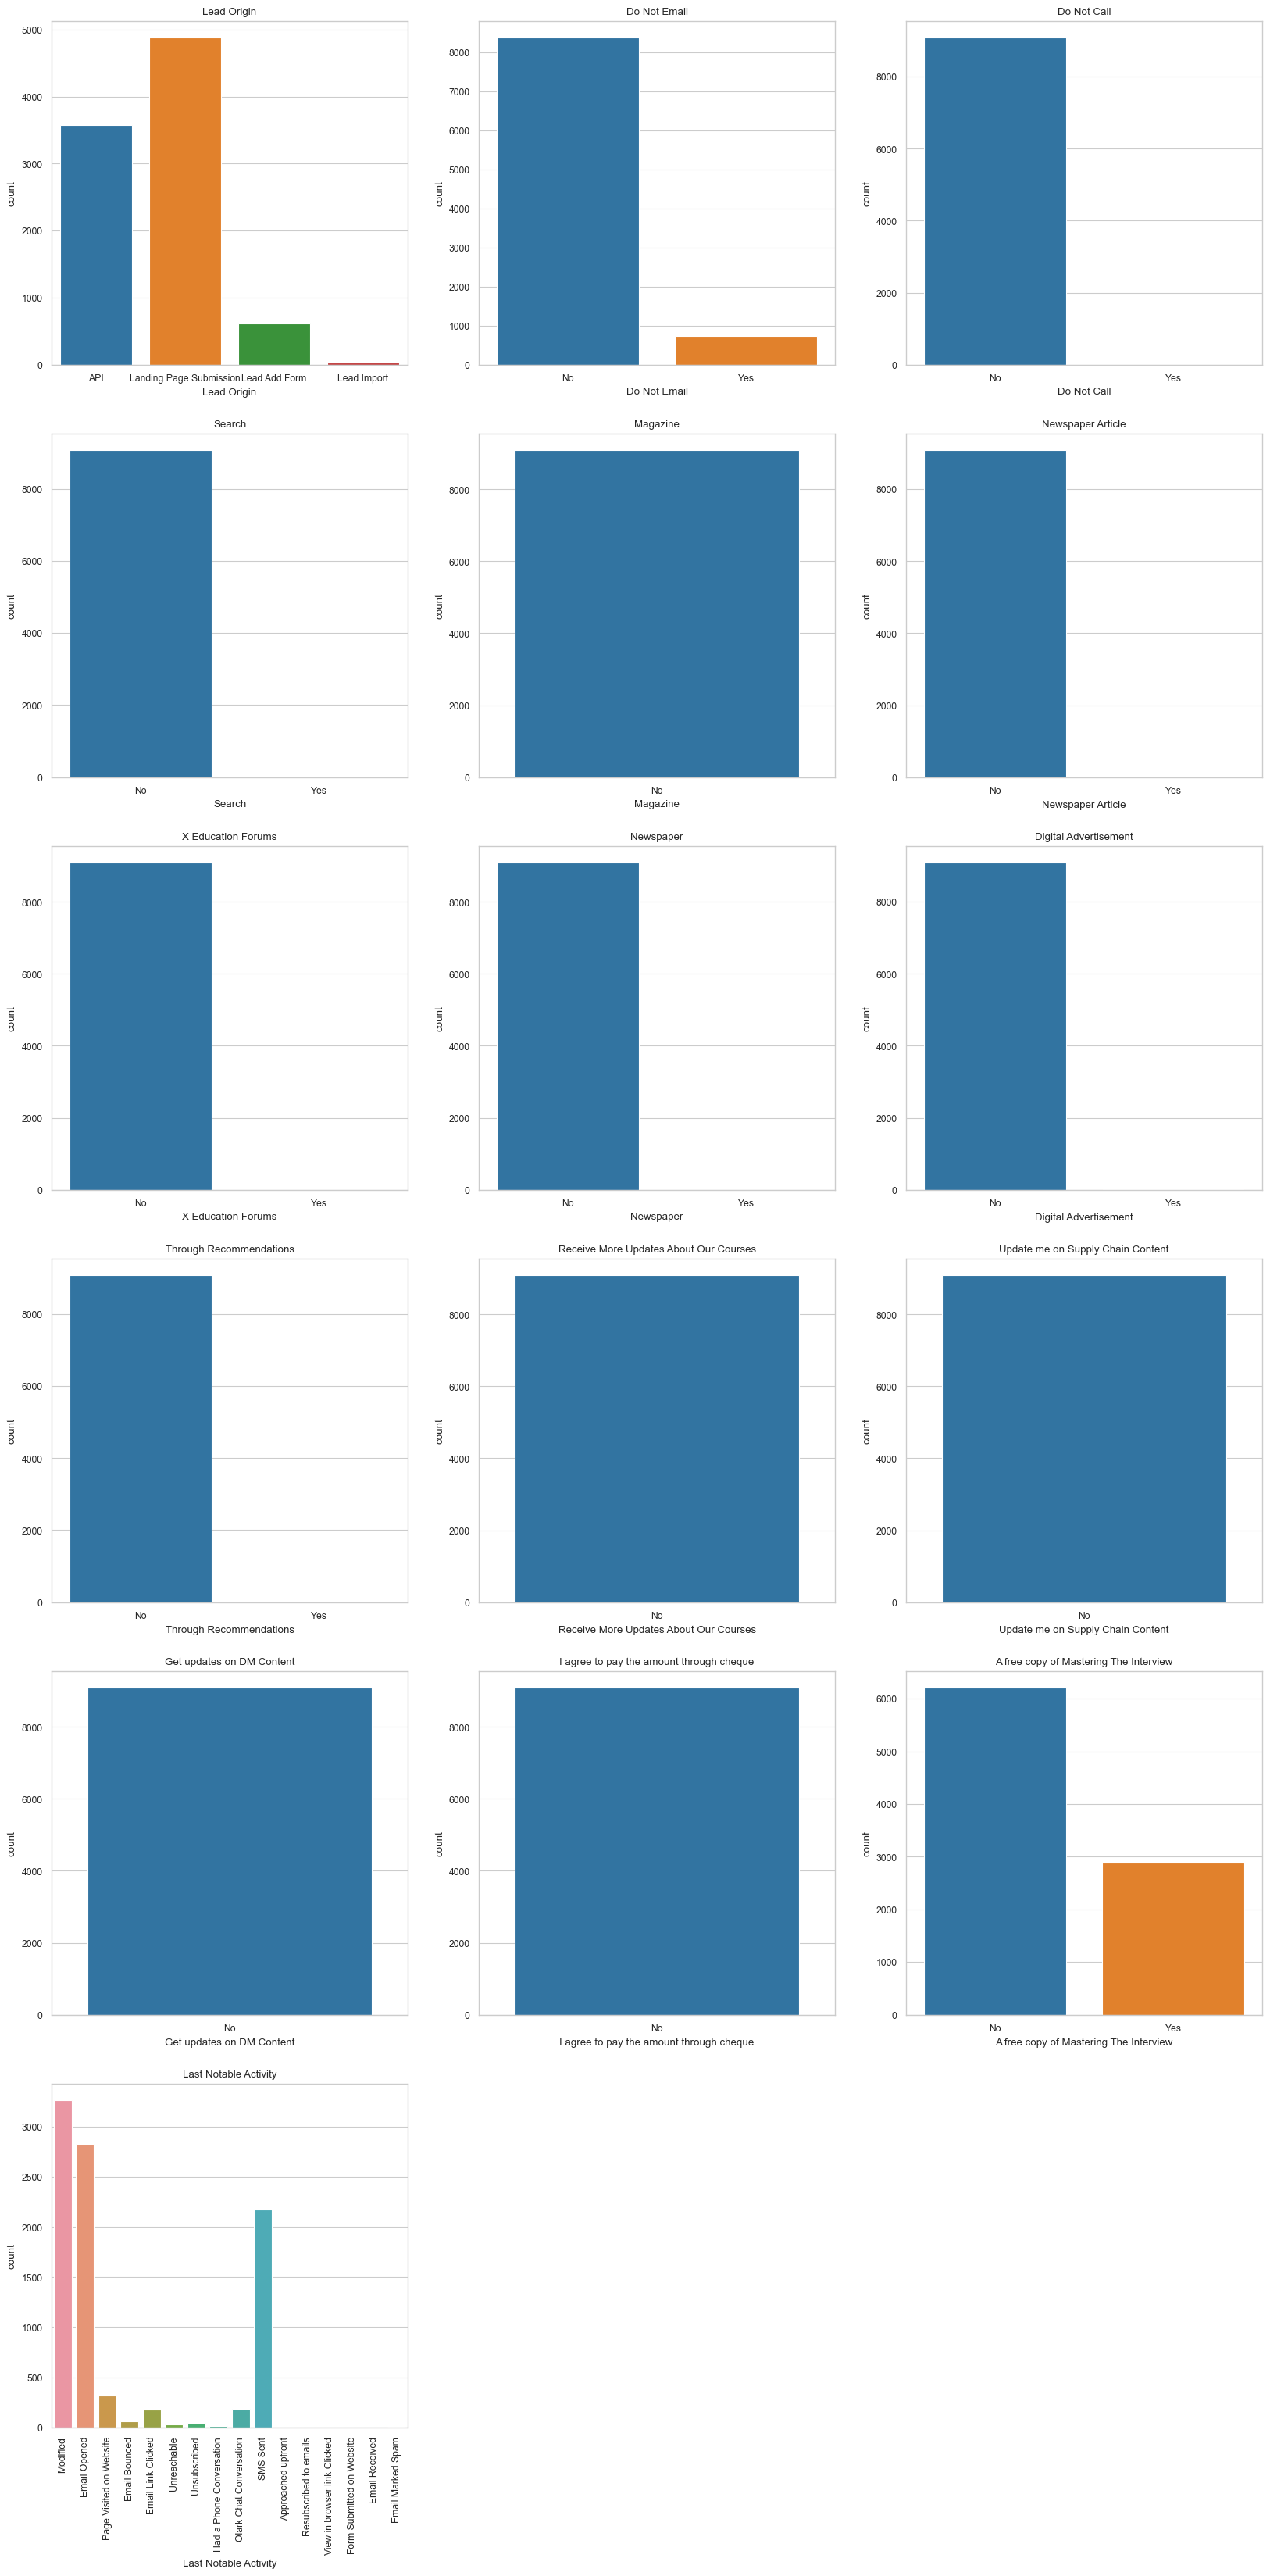

In [469]:
plt.figure(figsize = (20,40))

plt.subplot(6,3,1)
sns.countplot(leads_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,3,2)
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,3,3)
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,3,4)
sns.countplot(leads_df['Search'])
plt.title('Search')

plt.subplot(6,3,5)
sns.countplot(leads_df['Magazine'])
plt.title('Magazine')

plt.subplot(6,3,6)
sns.countplot(leads_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,3,7)
sns.countplot(leads_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,3,8)
sns.countplot(leads_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,3,9)
sns.countplot(leads_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,3,10)
sns.countplot(leads_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,3,11)
sns.countplot(leads_df['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')

plt.subplot(6,3,12)
sns.countplot(leads_df['Update me on Supply Chain Content'])
plt.title('Update me on Supply Chain Content')

plt.subplot(6,3,13)
sns.countplot(leads_df['Get updates on DM Content'])
plt.title('Get updates on DM Content')

plt.subplot(6,3,14)
sns.countplot(leads_df['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(6,3,15)
sns.countplot(leads_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,3,16)
sns.countplot(leads_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


### Thoughts: 
The following columns are highly skewed: 
* 'Search'
* 'Magazine'
* 'Newspaper Article'
* 'X Education Forums'
* 'Newspaper'
* 'Digital Advertisement'
* 'Receive More Updates About Our Courses'
* 'Update me on Supply Chain Content'
* 'Get updates on DM Content'
* 'I agree to pay the amount through cheque'

In [470]:
# Dropping columns with highly skewed data
leads_df = leads_df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                          'Digital Advertisement','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [471]:
# Confirming if columns are dropped
leads_df.shape

(9103, 15)

### 5.2 Analyzing numerical variables

In [472]:
# Lets check for data imbalance in the target variable
(leads_df['Converted'].value_counts(normalize=True)*100).round(2)

0   61.98
1   38.02
Name: Converted, dtype: float64

### Thoughts:
* We have a conversion rate of 38.02%, this is a relatively good representation of both classes so we are okay to proceed with further analysis

In [473]:
leads_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.00,9103.00,9103.00,9103.00
mean,0.38,3.45,481.35,2.36
std,0.49,4.85,545.07,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,9.00,1.00
50%,0.00,3.00,244.00,2.00
75%,1.00,5.00,919.50,3.00
90%,1.00,7.00,1372.00,5.00
95%,1.00,10.00,1556.90,6.00
99%,1.00,17.00,1838.96,9.00


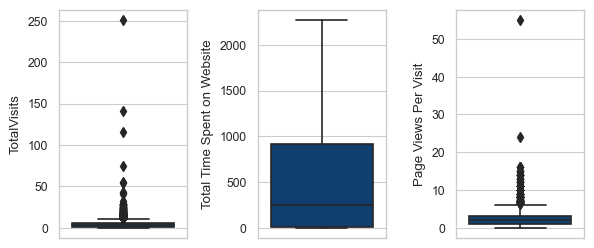

In [474]:
# Let us visualize the distribution of the numeric variables
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Plotting the distribution of the numeric variables
def box_plot(var_list):
    plt.figure(figsize=(10,5))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette= 'ocean_r',data= leads_df)
    
    plt.tight_layout()
    
    plt.show()

box_plot(num_cols)

### Thoughts:
There are some outliers in 'TotalVisits' and 'Page Views Per Visit'. We will remove these outliers

In [475]:
Q1 = leads_df['TotalVisits'].quantile(0.25)
Q3 = leads_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.25)
Q3 = leads_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

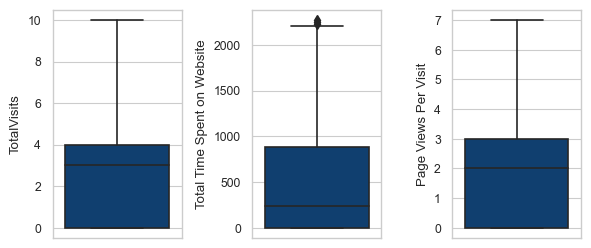

In [476]:
# Checking if outliers are removed
box_plot(num_cols)

### **6. Data Preparation**

In [477]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,No,Low in Relevance,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,No,Not Sure,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,No,Might be,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,No,Not Sure,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,No,Might be,No,Modified


#### 6.1 Converting some binary variables (Yes/No) to 0/1

In [478]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

# Checking the first 5 rows of the dataframe
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,0,Low in Relevance,0,Modified
1,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,0,Not Sure,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,0,Might be,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,0,Not Sure,0,Modified
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,0,Might be,0,Modified


#### 6.2 For categorical variables with multiple levels, we will create dummy features (one-hot encoded)

In [479]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3139
Email Opened                    2668
SMS Sent                        2061
Page Visited on Website          241
Olark Chat Conversation          174
Email Link Clicked               163
Email Bounced                     59
Unsubscribed                      46
Unreachable                       30
Had a Phone Conversation          11
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [480]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4503
API                        3462
Lead Add Form               604
Lead Import                  30
Name: Lead Origin, dtype: int64

In [481]:
# Creating dummy variables for the categorical variables and dropping one level .

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Import column
lo1 = lo.drop(['Lead Origin_Lead Import'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Others column
ls1 = ls.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Others column
la1 = la.drop(['Last Activity_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
# Dropping Specialization_Services Excellence column
sp1 = sp.drop(['Specialization_Services Excellence'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
wo = pd.get_dummies(leads_df['What is your current occupation'], prefix='What is your current occupation')
# Dropping What is your current occupation_Housewife column
wo1 = wo.drop(['What is your current occupation_Housewife'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,wo1], axis=1)

# Creating dummy variables for the variable 'Lead Quality'
lq = pd.get_dummies(leads_df['Lead Quality'], prefix='Lead Quality')
# Dropping Lead Quality_Low in Relevance column
lq1 = lq.drop(['Lead Quality_Low in Relevance'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lq1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Last Notable Activity_Email Received column
ln1 = ln.drop(['Last Notable Activity_Email Received'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ln1], axis=1)


In [482]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,0,Low in Relevance,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,0,Not Sure,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,0,Might be,1,Email Opened,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,0,Not Sure,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,0,Might be,0,Modified,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [483]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Lead Quality','Last Notable Activity'], 1)
leads_df.shape

(8599, 60)

In [484]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.00,0,0.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.00,674,2.50,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.00,1532,2.00,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.00,305,1.00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.00,1428,1.00,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [485]:
# Checking if any categorical column is left
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8599 non-null   int64  
 1   Do Not Call                                           8599 non-null   int64  
 2   Converted                                             8599 non-null   int64  
 3   TotalVisits                                           8599 non-null   float64
 4   Total Time Spent on Website                           8599 non-null   int64  
 5   Page Views Per Visit                                  8599 non-null   float64
 6   Through Recommendations                               8599 non-null   int64  
 7   A free copy of Mastering The Interview                8599 non-null   int64  
 8   Lead Origin_API                                       8599

### 6.3 Train - Test Split

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00,1428,1.00,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [488]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [489]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### 6.4 Feature Scaling

In [490]:
from sklearn.preprocessing import StandardScaler

'''
Scaling helps assess the impact of one feature to another
It helps in reducing the bias that may be present in the data
It also helps in reducing the computation time

'''

'\nScaling helps assess the impact of one feature to another\nIt helps in reducing the bias that may be present in the data\nIt also helps in reducing the computation time\n\n'

In [491]:
scaler = StandardScaler()

# learn the mean and standard deviation from the trainset - hence fit_transform
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4248,0,0,0.07,-0.70,-0.37,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6779,0,0,-0.34,-0.69,-0.08,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8284,0,0,1.33,-0.26,0.50,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3863,0,0,2.16,-0.30,0.31,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1703,0,0,0.07,-0.80,0.50,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### **7. Model Building**

### 7.1 Checking the Lead Conversion Rate

In [492]:
# Checking the conversion rate
conversion = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion

37.63228282358414

We have almost 38% Lead Conversion Rate

### 7.2 Looking at Correlations

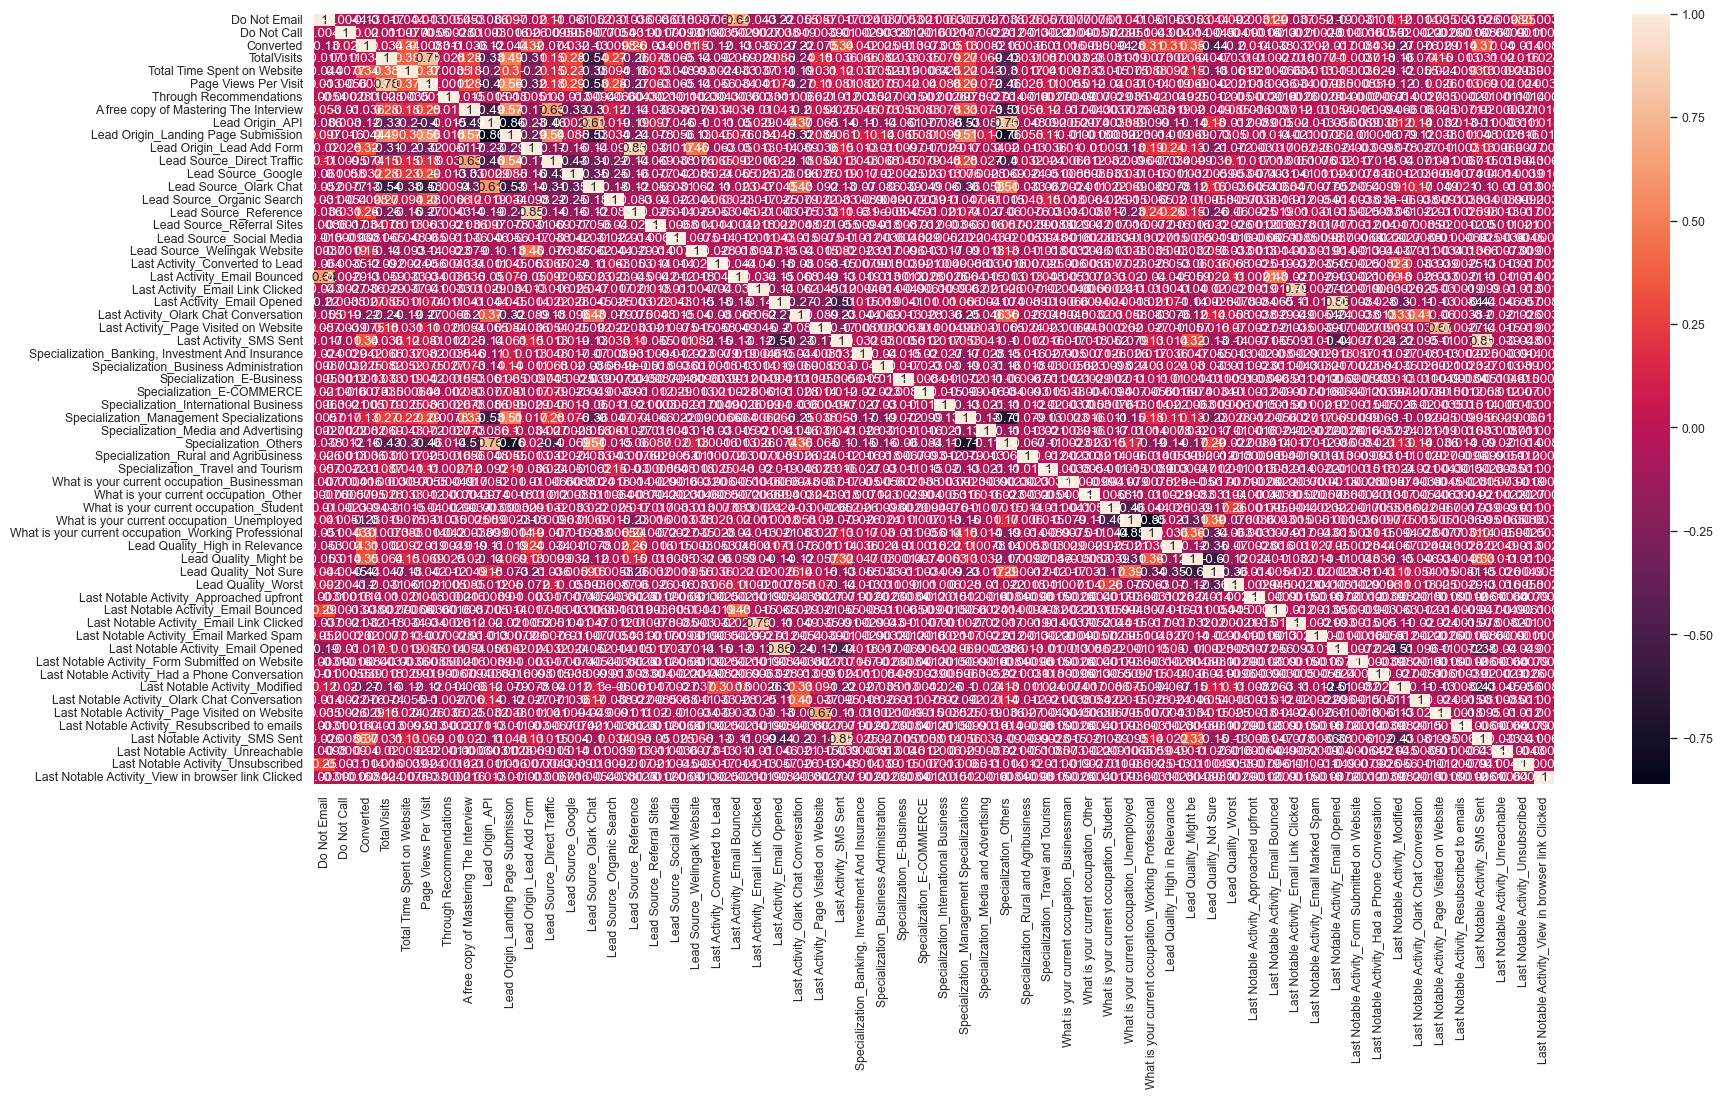

In [493]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True)
plt.show()

### Thoughts
* Some features seem to be correlated, we will look out for this while building the model

Let's start by splitting our data into a training set and a test set.

### 7.3 Model 1

#### Running our First Training Model

In [494]:
import statsmodels.api as sm

In [495]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.5
Date:                Mon, 19 Jun 2023   Deviance:                       3955.0
Time:                        16:41:10   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4892
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   38.5715   5.09e+04      0.001      0.999   -9.98e+04    9.99e+04
Do Not Email                                            -0.9226      0.238     -3.881      0.000      -1.389      -0.457
Do Not Call                                             22.1143   3.35e+04      0.001      0.999   -6.56e+04    6.56e+04
TotalVisits                                              0.2480      0.065      3.816      0.000       0.121       0.375
Total Time Spent on Website                              1.0433      0.047     21.988      0.000       0.950       1.136
Page Views Per Visit                                    -0.2917      0.071     -4.087      0.000      -0.432      -0.152
Through Recommendations                                  1.0042      1.835      0.547      0.584      -2.592       4.601
A free copy of Mastering The Interview                   0.0463      0.132      0.352      0.725      -0.212       0.304
Lead Origin_API                                         -0.8886      1.395     -0.637      0.524      -3.623       1.846
Lead Origin_Landing Page Submission                     -1.3746      1.398     -0.983      0.326      -4.115       1.366
Lead Origin_Lead Add Form                                1.6409      1.533      1.071      0.284      -1.363       4.645
Lead Source_Direct Traffic                               2.0799      1.311      1.587      0.113      -0.489       4.649
Lead Source_Google                                       2.4169      1.305      1.852      0.064      -0.141       4.975
Lead Source_Olark Chat                                   3.5056      1.316      2.664      0.008       0.927       6.084
Lead Source_Organic Search                               2.2133      1.313      1.685      0.092      -0.361       4.787
Lead Source_Reference                                    2.2703      1.312      1.731      0.083      -0.301       4.841
Lead Source_Referral Sites                               1.8219      1.368      1.331      0.183      -0.860       4.504
Lead Source_Social Media                                 2.3568      1.856      1.270      0.204      -1.282       5.995
Lead Source_Welingak Website                             6.2779      1.640      3.829      0.000       3.064       9.491
Last Activity_Converted to Lead                         -0.2949      0.386     -0.763      0.445      -1.052       0.463
Last Activity_Email Bounced                             -0.4475      0.641     -0.698      0.485      -1.704       0.809
Last Activity_Email Link Clicked                         0.2548      0.533      0.478      0.632      -0.789       1.299
Last Activity_Email Opened                               0

### Feature Selection Using RFE

In [496]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [497]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=20)  # running RFE with 20 variables as output
       
rfe = rfe.fit(X_train, y_train)

In [498]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False])

In [499]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Through Recommendations', False, 14),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', Fals

In [500]:
col = X_train.columns[rfe.support_]

In [501]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising', 'Specialization_Others',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other'

##### Assessing the model with StatsModels

### 7.4 Model 2

In [502]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5998
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.5
Date:                Mon, 19 Jun 2023   Deviance:                       4025.0
Time:                        16:41:26   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.7171      0.632      5.886      0.000       2.479       4.955
Do Not Email                                            -1.0482      0.215     -4.873      0.000      -1.470      -0.627
Total Time Spent on Website                              1.0537      0.047     22.637      0.000       0.962       1.145
Lead Origin_API                                         -1.1897      0.608     -1.956      0.050      -2.382       0.002
Lead Origin_Landing Page Submission                     -1.6130      0.605     -2.668      0.008      -2.798      -0.428
Lead Origin_Lead Add Form                                1.5139      0.645      2.347      0.019       0.250       2.778
Lead Source_Olark Chat                                   1.2497      0.138      9.029      0.000       0.978       1.521
Lead Source_Welingak Website                             3.9065      1.041      3.754      0.000       1.867       5.946
Last Activity_Converted to Lead                         -1.0756      0.260     -4.143      0.000      -1.585      -0.567
Last Activity_Email Bounced                             -1.2067      0.422     -2.857      0.004      -2.034      -0.379
Last Activity_Olark Chat Conversation                   -1.4232      0.225     -6.315      0.000      -1.865      -0.981
What is your current occupation_Working Professional     1.6408      0.218      7.524      0.000       1.213       2.068
Lead Quality_High in Relevance                           1.0907      0.284      3.835      0.000       0.533       1.648
Lead Quality_Might be                                   -0.9483      0.185     -5.139      0.000      -1.310      -0.587
Lead Quality_Not Sure                                   -2.7539      0.168    -16.414      0.000      -3.083      -2.425
Lead Quality_Worst                                      -4.7494      0.384    -12.379      0.000      -5.501      -3.997
Last Notable Activity_Email Link Clicked                -1.8578      0.302     -6.159      0.000      -2.449      -1.267
Last Notable Activity_Email Opened                      -1.4163      0.103    -13.783      0.000      -1.618      -1.215
Last Notable Activity_Modified                          -1.7184      0.115    -14.942      0.000      -1.944      -1.493
Last Notable Activity_Olark Chat Conversation           -1.3889      0.417     -3.332      0.001      -2.206      -0.572
Last Notable Activity_Page Visited on Website           -1.5541      0.279     -5.561      0.000      -2.102      -1.006
========================================================================================================================
"""

In [503]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4248   0.02
6779   0.09
8284   0.37
3863   0.07
1703   0.08
7750   0.92
1508   0.09
4597   0.80
1819   0.87
8705   0.01
dtype: float64

In [504]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02283052, 0.08555272, 0.36897252, 0.0746922 , 0.07704463,
       0.92161377, 0.08630283, 0.80145889, 0.86723977, 0.01487878])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [505]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.02,4248
1,0,0.09,6779
2,1,0.37,8284
3,0,0.07,3863
4,0,0.08,1703


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [506]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.02,4248,0
1,0,0.09,6779,0
2,1,0.37,8284,0
3,0,0.07,3863,0
4,0,0.08,1703,0


### Creating a confusion Metrix

In [507]:
# Confusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3365  362]
 [ 492 1800]]


In [508]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8581159661073268


#### Checking VIFs

In [509]:
# Checking for the VIF values of the feature variables. 
# Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [510]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,12.18
13,Lead Quality_Not Sure,11.95
2,Lead Origin_API,10.44
12,Lead Quality_Might be,3.74
17,Last Notable Activity_Modified,3.31
4,Lead Origin_Lead Add Form,2.78
5,Lead Source_Olark Chat,2.52
16,Last Notable Activity_Email Opened,2.46
14,Lead Quality_Worst,2.23
11,Lead Quality_High in Relevance,2.13


There seems to be multicollinearity present in our model as per VIF values

Let us now check the correlation among the features in the below heat map

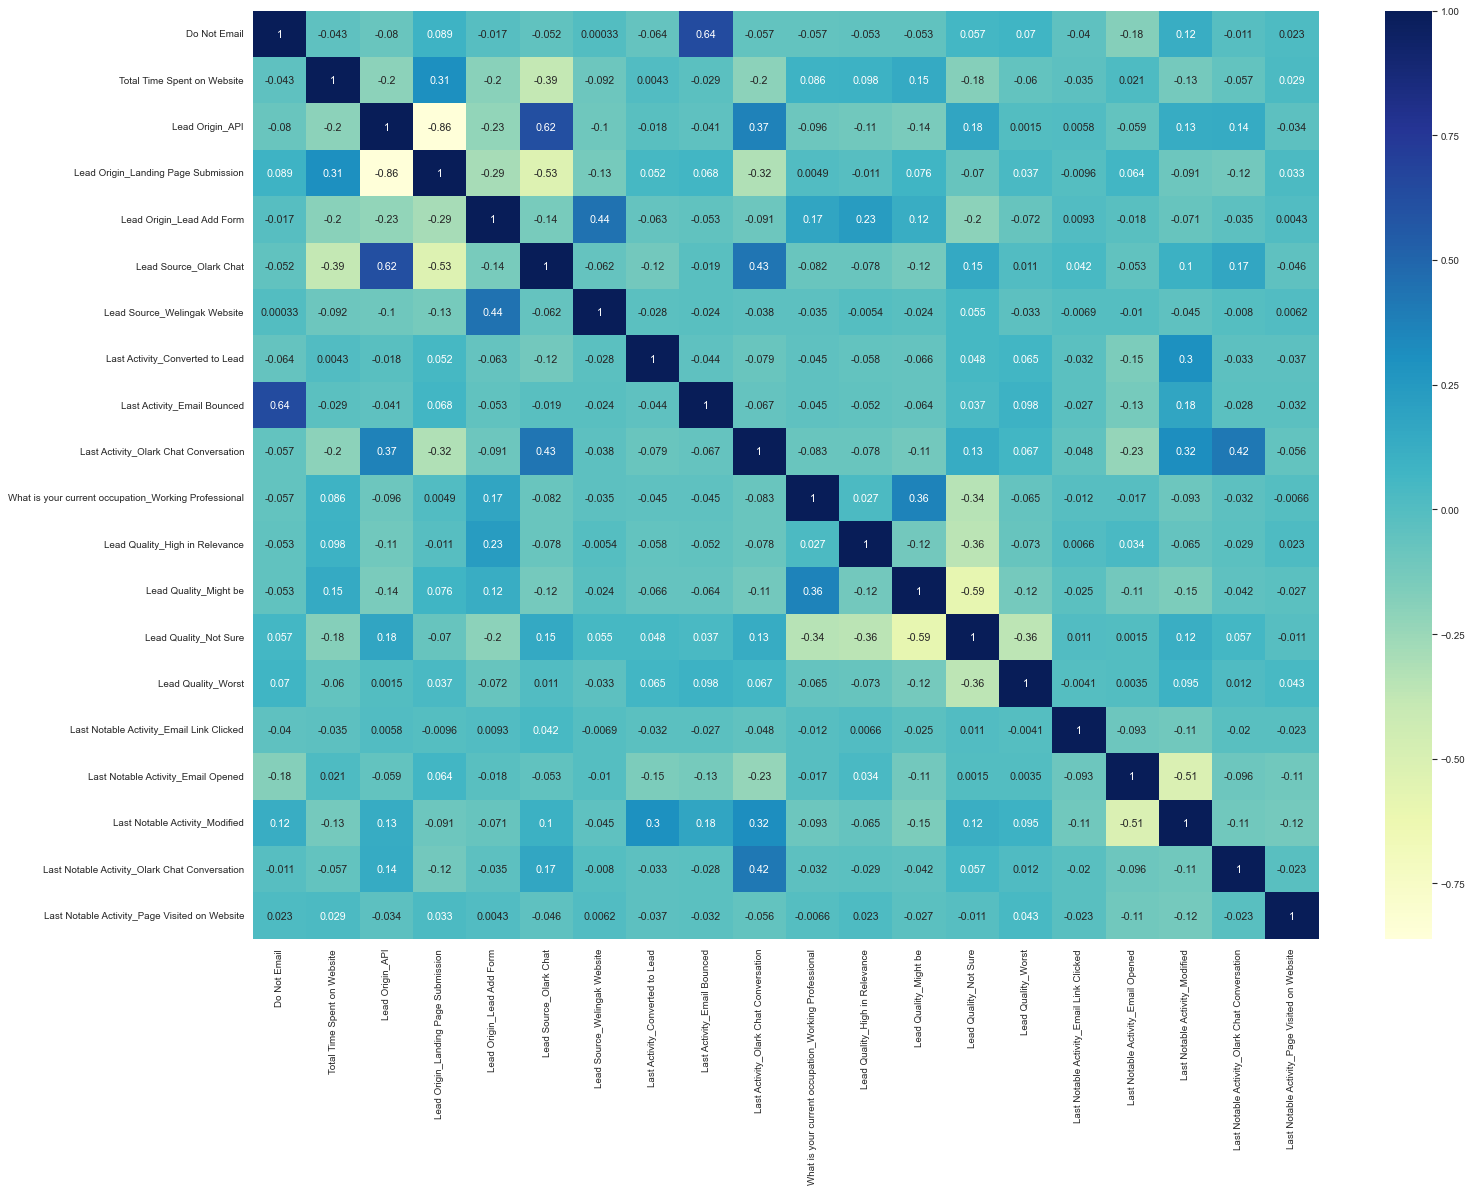

In [511]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping a variable and updating the model

### Thoughts:
* Some variables have high p values and/or high VIFs,such values are insignificant and we shall drop them

In [512]:
col = col.drop('Lead Origin_API', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### 7.5 Model 3

In [513]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     5999
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.2
Date:                Mon, 19 Jun 2023   Deviance:                       4028.4
Time:                        16:42:14   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5424      0.197     12.889      0.000       2.156       2.929
Do Not Email                                            -1.0498      0.215     -4.883      0.000      -1.471      -0.628
Total Time Spent on Website                              1.0460      0.046     22.594      0.000       0.955       1.137
Lead Origin_Landing Page Submission                     -0.4451      0.104     -4.260      0.000      -0.650      -0.240
Lead Origin_Lead Add Form                                2.6713      0.263     10.165      0.000       2.156       3.186
Lead Source_Olark Chat                                   1.2194      0.137      8.891      0.000       0.951       1.488
Lead Source_Welingak Website                             3.9070      1.041      3.754      0.000       1.867       5.947
Last Activity_Converted to Lead                         -1.0826      0.259     -4.174      0.000      -1.591      -0.574
Last Activity_Email Bounced                             -1.2062      0.422     -2.857      0.004      -2.034      -0.379
Last Activity_Olark Chat Conversation                   -1.4305      0.225     -6.350      0.000      -1.872      -0.989
What is your current occupation_Working Professional     1.6461      0.218      7.557      0.000       1.219       2.073
Lead Quality_High in Relevance                           1.0978      0.284      3.863      0.000       0.541       1.655
Lead Quality_Might be                                   -0.9380      0.184     -5.089      0.000      -1.299      -0.577
Lead Quality_Not Sure                                   -2.7487      0.168    -16.399      0.000      -3.077      -2.420
Lead Quality_Worst                                      -4.7455      0.383    -12.378      0.000      -5.497      -3.994
Last Notable Activity_Email Link Clicked                -1.8554      0.302     -6.154      0.000      -2.446      -1.264
Last Notable Activity_Email Opened                      -1.4084      0.103    -13.730      0.000      -1.609      -1.207
Last Notable Activity_Modified                          -1.7117      0.115    -14.895      0.000      -1.937      -1.487
Last Notable Activity_Olark Chat Conversation           -1.3796      0.417     -3.312      0.001      -2.196      -0.563
Last Notable Activity_Page Visited on Website           -1.5545      0.279     -5.569      0.000      -2.102      -1.007
========================================================================================================================
"""

In [514]:
col.value_counts()

Do Not Email                                            1
Lead Quality_High in Relevance                          1
Last Notable Activity_Olark Chat Conversation           1
Last Notable Activity_Modified                          1
Last Notable Activity_Email Opened                      1
Last Notable Activity_Email Link Clicked                1
Lead Quality_Worst                                      1
Lead Quality_Not Sure                                   1
Lead Quality_Might be                                   1
What is your current occupation_Working Professional    1
Total Time Spent on Website                             1
Last Activity_Olark Chat Conversation                   1
Last Activity_Email Bounced                             1
Last Activity_Converted to Lead                         1
Lead Source_Welingak Website                            1
Lead Source_Olark Chat                                  1
Lead Origin_Lead Add Form                               1
Lead Origin_La

In [515]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.02340215, 0.08820147, 0.37208759, 0.07470954, 0.0795137 ,
       0.92241907, 0.08696793, 0.80264863, 0.86703486, 0.01496531])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [516]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.02,4248
1,0,0.09,6779
2,1,0.37,8284
3,0,0.07,3863
4,0,0.08,1703


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [517]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.02,4248,0
1,0,0.09,6779,0
2,1,0.37,8284,0
3,0,0.07,3863,0
4,0,0.08,1703,0


In [518]:
### Checking the confusion metrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3361  366]
 [ 496 1796]]


In [519]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8567868416680512


So overall the accuracy hasn't dropped much

#### Checking VIFs

In [520]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,4.46
2,Lead Origin_Landing Page Submission,3.28
16,Last Notable Activity_Modified,2.95
4,Lead Source_Olark Chat,2.27
8,Last Activity_Olark Chat Conversation,2.07
15,Last Notable Activity_Email Opened,2.05
0,Do Not Email,1.91
3,Lead Origin_Lead Add Form,1.88
11,Lead Quality_Might be,1.86
7,Last Activity_Email Bounced,1.82


### Thoughts:
* The VIFs have dropped, there was definitely multicolliniality in older model
* All VIFs are under 5, lets proceed with Model 3

### Observations and Insights:

* For our latest model we have the following:
    * Low p-values,all p-values are under 0.05. Our features are therefore significant
    * Low VIFs, all under 5,meaning there is low multicolliniality among features
    * Overall accuracy of 85.68% is acceptable
* Now we can proceed with making predictions using our model

### 7.6 Calculating Metrics beyond simply accuracy

In [521]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [522]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.7835951134380453

In [523]:
# Calculating specificity
TN / float(TN+FP)

0.9017976925140864

In [524]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.0982023074859136


In [525]:
# positive predictive value 
print (TP / float(TP+FP))

0.8307123034227567


In [526]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8714026445423905


### 7.7 Plotting the ROC Curve

The ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [527]:
### Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [528]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

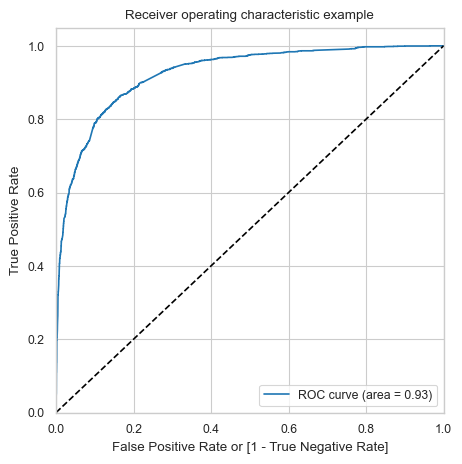

In [529]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [530]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [531]:
auc = auc_val(fpr,tpr)
auc

0.9252696351467492

The ROC is as we would like it to be, so we have a good model

### 7.8 Finding Optimal Cutoff Point

In [532]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.02,4248,0,1,0,0,0,0,0,0,0,0,0
1,0,0.09,6779,0,1,0,0,0,0,0,0,0,0,0
2,1,0.37,8284,0,1,1,1,1,0,0,0,0,0,0
3,0,0.07,3863,0,1,0,0,0,0,0,0,0,0,0
4,0,0.08,1703,0,1,0,0,0,0,0,0,0,0,0


In [533]:
# Now calculating the accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.73   0.97   0.58
0.20  0.20      0.80   0.93   0.72
0.30  0.30      0.84   0.86   0.83
0.40  0.40      0.85   0.82   0.87
0.50  0.50      0.86   0.78   0.90
0.60  0.60      0.85   0.71   0.94
0.70  0.70      0.83   0.64   0.95
0.80  0.80      0.82   0.56   0.97
0.90  0.90      0.78   0.44   0.99


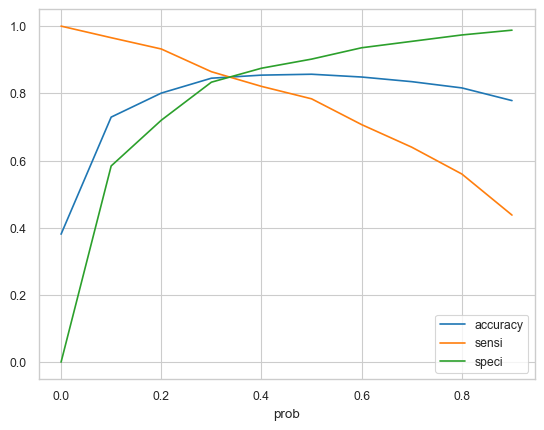

In [534]:
# Plotting accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [535]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.02,4248,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.09,6779,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.37,8284,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.07,3863,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.08,1703,0,1,0,0,0,0,0,0,0,0,0,0


In [536]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8518026250207675

In [537]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3220,  507],
       [ 385, 1907]], dtype=int64)

In [538]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [539]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.8320244328097731

In [540]:
# Calculating specificity
TN / float(TN+FP)

0.8639656560236115

In [541]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.13603434397638853


In [542]:
# positive predictive value 
print (TP / float(TP+FP))

0.7899751449875725


In [543]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8932038834951457


### 7.9 Precision and Recall

In [544]:
from sklearn.metrics import precision_score, recall_score

In [545]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3361,  366],
       [ 496, 1796]], dtype=int64)

##### Precision
TP / TP + FP

In [546]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8307123034227567

##### Recall
TP / TP + FN

In [547]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7835951134380453

### Precision and recall tradeoff

In [548]:
from sklearn.metrics import precision_recall_curve

In [549]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6014    0
 6015    0
 6016    0
 6017    1
 6018    0
 Name: Converted, Length: 6019, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6014    1
 6015    0
 6016    0
 6017    1
 6018    0
 Name: predicted, Length: 6019, dtype: int64)

In [550]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

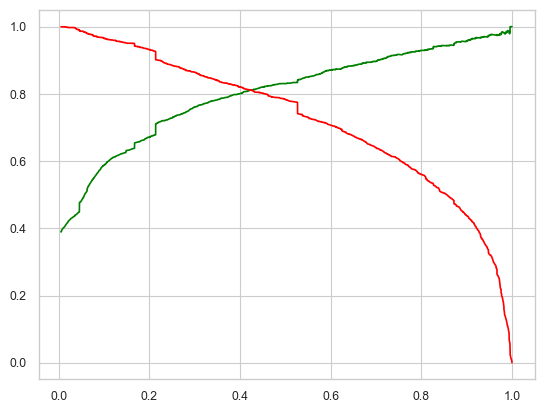

In [551]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### **8. Making predictions on the test set**

### 8.1 Making preditions on test set

In [552]:
# Transforming the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1584,0,0,-0.34,-0.10,-0.65,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
999,0,0,1.33,2.52,2.22,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
681,0,0,0.07,-0.51,-0.37,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4943,0,0,0.91,0.46,0.21,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7485,0,0,-0.34,-0.63,-0.08,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [553]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
1584,0,-0.10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
999,0,2.52,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
681,0,-0.51,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4943,0,0.46,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7485,0,-0.63,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [554]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [555]:
y_test_pred = res.predict(X_test_sm)

In [556]:
y_test_pred[:10]

1584   0.45
999    0.92
681    0.10
4943   0.84
7485   0.06
2094   0.93
7725   1.00
8971   0.53
4584   0.79
6435   0.98
dtype: float64

In [557]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [558]:
# Let's see the head
y_pred_1.head()

,0
1584,0.45
999,0.92
681,0.10
4943,0.84
7485,0.06


In [559]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [560]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [561]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [562]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [563]:
y_pred_final.head()

,Converted,LeadID,0
0,0,1584,0.45
1,1,999,0.92
2,0,681,0.10
3,1,4943,0.84
4,0,7485,0.06


In [564]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [565]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [566]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,1584,0,0.45
1,999,1,0.92
2,681,0,0.10
3,4943,1,0.84
4,7485,0,0.06


Using the probability threshold value 0f 0.37 on the test dataset to predict if a lead will convert

In [567]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [568]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1584,0,0.45,1
1,999,1,0.92,1
2,681,0,0.10,0
3,4943,1,0.84,1
4,7485,0,0.06,0


### 8.2 Evaluating model performance on test set

In [569]:
# Checking the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8472868217054264

* The overall accuracy is within an acceptable range

In [570]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1416  220]
 [ 174  770]]


Showcasing the different metrics beyond accuracy on the test dataset

In [571]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

Sensitivity

TP / TP + FN

In [572]:
# Let's see the sensitivity of our  model
TP / float(TP+FN)

0.815677966101695

Specificity

TN / TN + FP

In [573]:
# Calculating specificity
TN / float(TN+FP)

0.8655256723716381

False Postive Rate

FP / TN + FP

In [574]:
# Calculating false postive rate 
print(FP/ float(TN+FP))

0.13447432762836187


Positive Predictive Value

TP / TP + FP

In [575]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7777777777777778


Negative Predictive Value

TN / TN + FN

In [576]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8905660377358491


### Classification Report

In [577]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1636
           1       0.78      0.82      0.80       944

    accuracy                           0.85      2580
   macro avg       0.83      0.84      0.84      2580
weighted avg       0.85      0.85      0.85      2580



### Cross Validaton Score

To avoid overfitting, we calculate the Cross Validation Score to see how our model performs

In [578]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.79860303 0.80232558 0.82906977 0.83139535 0.8372093  0.84883721
 0.85697674 0.86744186 0.86744186 0.87790698]
0.841720767793811


Our model seems to generalize well on test data

### ROC Curve for Test Dataset

In [579]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [580]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

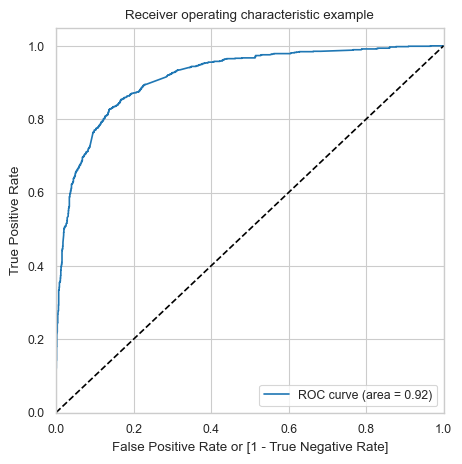

In [581]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)

In [582]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [583]:
auc = auc_val(fpr,tpr)
auc

0.9169814631594226

Based on the ROC curve, our model performs well on test data as expected

### **9. Calculating Lead score for the entire dataset**

Lead Score = 100 * ConversionProbability

This needs to be calculated for all the leads from the original dataset (train + test)

In [584]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1584,0,0.45,1
1,999,1,0.92,1
2,681,0,0.10,0
3,4943,1,0.84,1
4,7485,0,0.06,0


In [585]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.02,4248,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.09,6779,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.37,8284,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.07,3863,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.08,1703,0,1,0,0,0,0,0,0,0,0,0,0


In [586]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4248,0,0.02,0
1,6779,0,0.09,0
2,8284,1,0.37,1
3,3863,0,0.07,0
4,1703,0,0.08,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [587]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4248,0,0.02,0
1,6779,0,0.09,0
2,8284,1,0.37,1
3,3863,0,0.07,0
4,1703,0,0.08,0


In [588]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6019, 4)
(2580, 4)
(8599, 4)


In [589]:
# Ensuring the LeadIDs are unique for each lead in the final dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8599

In [590]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,4248,0,0.02,0,2
1,6779,0,0.09,0,9
2,8284,1,0.37,1,37
3,3863,0,0.07,0,7
4,1703,0,0.08,0,8


In [591]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [592]:
# Making the LeadID column as index
# We will later join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.76,1,76
1,0,0.23,0,23
2,1,0.86,1,86
3,0,0.06,0,6
4,1,0.55,1,55


### **10. Determining Feature Importance**

In [593]:
pd.options.display.float_format = '{:.2f}'.format # Setting the display format 
new_params = res.params[1:] # Assigning the parameters to a new variable
new_params

Do Not Email                                           -1.05
Total Time Spent on Website                             1.05
Lead Origin_Landing Page Submission                    -0.45
Lead Origin_Lead Add Form                               2.67
Lead Source_Olark Chat                                  1.22
Lead Source_Welingak Website                            3.91
Last Activity_Converted to Lead                        -1.08
Last Activity_Email Bounced                            -1.21
Last Activity_Olark Chat Conversation                  -1.43
What is your current occupation_Working Professional    1.65
Lead Quality_High in Relevance                          1.10
Lead Quality_Might be                                  -0.94
Lead Quality_Not Sure                                  -2.75
Lead Quality_Worst                                     -4.75
Last Notable Activity_Email Link Clicked               -1.86
Last Notable Activity_Email Opened                     -1.41
Last Notable Activity_Mo

### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [594]:
# feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -26.87
Total Time Spent on Website                              26.77
Lead Origin_Landing Page Submission                     -11.39
Lead Origin_Lead Add Form                                68.37
Lead Source_Olark Chat                                   31.21
Lead Source_Welingak Website                            100.00
Last Activity_Converted to Lead                         -27.71
Last Activity_Email Bounced                             -30.87
Last Activity_Olark Chat Conversation                   -36.61
What is your current occupation_Working Professional     42.13
Lead Quality_High in Relevance                           28.10
Lead Quality_Might be                                   -24.01
Lead Quality_Not Sure                                   -70.35
Lead Quality_Worst                                     -121.46
Last Notable Activity_Email Link Clicked                -47.49
Last Notable Activity_Email Opened                     

### Sorting the feature variables based on their relative coefficient values

In [595]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            13
Total Time Spent on Website                             12
Lead Origin_Landing Page Submission                     14
Lead Origin_Lead Add Form                               16
Lead Source_Olark Chat                                  18
Lead Source_Welingak Website                             8
Last Activity_Converted to Lead                         15
Last Activity_Email Bounced                             17
Last Activity_Olark Chat Conversation                    7
What is your current occupation_Working Professional     6
Lead Quality_High in Relevance                           0
Lead Quality_Might be                                   11
Lead Quality_Not Sure                                    2
Lead Quality_Worst                                       1
Last Notable Activity_Email Link Clicked                10
Last Notable Activity_Email Opened                       4
Last Notable Activity_Modified                          

### Plot showing the feature variables based on their relative coefficient values

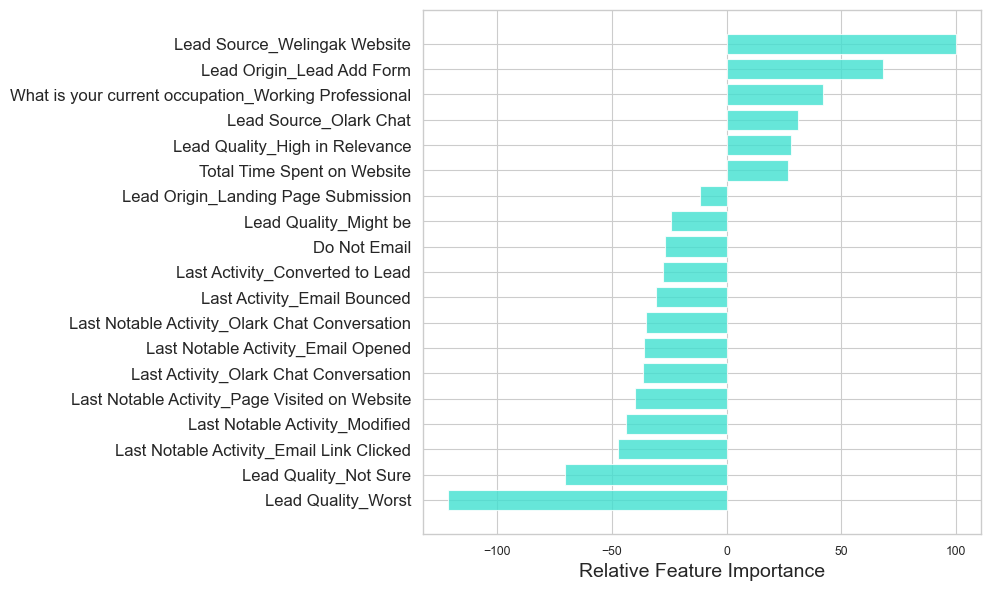

In [599]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'turquoise',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [600]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
5,Lead Source_Welingak Website,100.00
3,Lead Origin_Lead Add Form,68.37
9,What is your current occupation_Working Profes...,42.13


### **11. Conclusion**

### 11.1 Key Observations and Insights


* The original dataset has 9240 enteries and 37 columns
* The original dataset has 9240 enteries and 37 columns
* There were no duplicate values in the dataset
* The dataset had missing values, we handled these through various techniques icluding removing / imputation
* The dataset had some redundant columns e.g Lead columns so we dropped some redundat and/insignicant features
* We Converted the level 'Select' to NaN as Select means the customer did not select an option. Columns with 'Select' where: ['Specialization',  'How did you hear about X Education',  'Lead Profile',  'City']
* We encoded categorical variables for easier understanding by the model
* We created dummy variables for some categorical features with multiple levels
* Some features like Search, Magazine were extremely skewed thus not important for our analysis, we dropped them
* We had a conversion rate of 38.02%, this is a relatively good representation of both classes
* Numeric features TotalVisits and Page Views Per Visit had some outliers that we dealt with

### 11.2 Insights on our recommended model

* Having explored several models, our best model had the following characteristics
    * All p-values were less than 0.05 implying that our features were significant
    * All VIFs were under 5 implying there was very low multicolliniarity
    * The model genralized very well on the test data set with test accuracy within less than 5% of the train accuracy

### 11.3 Business Recommendations

* When looking at the feature Lead Source
    * The majority of generated leads come from Google and Direct traffic, while the least number of leads originate from Others
    * The Welingak website exhibits a very high conversion rate, hence, it  is advisable to maximize leads from this website
    * Prioritizing Olark chat, Organic search, Direct traffic, and Google leads may result in increased lead conversion


* Management specialization is important as manager seem to be likely to convert favourably
* From EDA, most of the successfully converted leads come from the Unemployed, special attention should be given to this group
* The are good chances of a working professional to sign up for a course
* It appears that the categories of "Housewives," "Businessman," "Student," and "Other" are not easily converted to enroll in the course
* When looking at the feature Last Activity,SMS Sent has the highest success conversion rate followed by Email Opened

    
    

* The probability of lead conversion tends to increase as the values of the following features increase:
    * Lead Source_Welingak Website
    * Lead Origin_Lead Add Form
    * Lead Origin_Landing Page Submission
    * What is your current occupation_Working professional
    * Lead Source_Olark Chat
    * Lead Quality_High in Relevance
    * Total Time Spent on Website

* The probability of lead conversion tends to decrease as the values of the following features decrease:
    * Lead Quality_Worst
    * Lead Quality_Not Sure
    * Last Notable Activity_Email Link Clicked
    * Last Notable Activity_Modified
    * Last Notable Activity_Page Visited on Website
    * Last Notable Activity_Olark Chat Conversation
    * Last Notable Activity_Email Opened
    Last Activity_Email Bounced
    * Do Not Email 

* It is important to note that, based on the business requirements, we have the flexibility to adjust the probability threshold value. Modifying this threshold value allows us to control the trade-off between sensitivity and specificity in the model. Increasing the threshold will decrease sensitivity but increase specificity, while decreasing the threshold will have the opposite effect, increasing sensitivity but decreasing specificity. This adjustment allows us to tailor the model's behavior to align with specific business needs and priorities.

* A high sensitivity value ensures that most leads who are likely to convert are correctly predicted as such. On the other hand, a high specificity value ensures that leads with borderline conversion probabilities are not falsely selected. In other words, high sensitivity focuses on minimizing false negatives (leads who should have been identified as likely to convert but were missed), while high specificity aims to minimize false positives (leads who are incorrectly identified as likely to convert). Balancing these two measures is crucial to achieve an optimal prediction outcome for lead conversion.